In [90]:
# Import libraries
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Libraries loaded")


✓ Libraries loaded


In [91]:
# Konfigurasi path dan parameter
INPUT_CSV = "../data/raw/turnbackhoax/metadata/tbh_with_images.csv"
OUTPUT_CSV = "../data/raw/turnbackhoax/metadata/tbh_cleaned.csv"

DATE_START = datetime(2024, 1 , 1)
DATE_END = datetime(2025, 10, 20 )

print(f"Input: {INPUT_CSV}")
print(f"Output: {OUTPUT_CSV}")
print(f"Date range: {DATE_START.strftime('%Y-%m-%d')} - {DATE_END.strftime('%Y-%m-%d')}")


Input: ../data/raw/turnbackhoax/metadata/tbh_with_images.csv
Output: ../data/raw/turnbackhoax/metadata/tbh_cleaned.csv
Date range: 2024-01-01 - 2025-10-20


In [92]:
# Load data
print("=" * 80)
print("LOAD DATA")
print("=" * 80)

df = pd.read_csv(INPUT_CSV)
initial_count = len(df)

print(f"\nTotal baris: {initial_count}")
print(f"Kolom: {list(df.columns)}")
print(f"\nShape: {df.shape}")


LOAD DATA

Total baris: 5049
Kolom: ['id', 'source', 'title', 'text', 'date', 'category', 'label', 'image_path', 'url', 'thumbnail_url']

Shape: (5049, 10)


In [93]:
# Info data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5049 non-null   object
 1   source         5049 non-null   object
 2   title          5049 non-null   object
 3   text           5049 non-null   object
 4   date           5049 non-null   object
 5   category       5048 non-null   object
 6   label          5049 non-null   int64 
 7   image_path     5043 non-null   object
 8   url            5049 non-null   object
 9   thumbnail_url  5049 non-null   object
dtypes: int64(1), object(9)
memory usage: 394.6+ KB


In [94]:
df = df.dropna(subset=['category']).reset_index(drop=True)


In [95]:
# Preview 5 baris pertama
df.head()

,id,source,title,text,date,category,label,image_path,url,thumbnail_url
0,TBH_POL_00001,turnbackhoax,[SALAH] Video “Prabowo Temui Mahasiswa saat De...,"Faktanya, pada saat demo 25 Agustus 2025 Presi...",2025-09-02,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00001\ima...,https://turnbackhoax.id/2025/09/02/salah-video...,https://turnbackhoax.id/wp-content/uploads/202...
1,TBH_POL_00002,turnbackhoax,[SALAH] Demo Tuntut Penangkapan Jokowi dan Mak...,"Faktanya, video tersebut merupakan demo penola...",2025-07-31,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00002\ima...,https://turnbackhoax.id/2025/07/31/salah-demo-...,https://turnbackhoax.id/wp-content/uploads/202...
2,TBH_POL_00003,turnbackhoax,[PENIPUAN] Wapres RI Gibran Bagi-Bagi Puluhan ...,Unggahan bukan berasal dari akun resmi bercent...,2024-11-01,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00003\ima...,https://turnbackhoax.id/2024/11/01/penipuan-wa...,https://turnbackhoax.id/wp-content/uploads/202...
3,TBH_POL_00004,turnbackhoax,[SALAH] Suasana Panik saat Presiden Mengeluark...,"Faktanya, video merupakan rapat pemilihan ketu...",2025-09-16,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00004\ima...,https://turnbackhoax.id/2025/09/16/salah-suasa...,https://turnbackhoax.id/wp-content/uploads/202...
4,TBH_POL_00005,turnbackhoax,[SALAH] Pesan WhatsApp Pendaftaran Petugas PPS...,Biro Pemerintahan Setda Provinsi Jakarta telah...,2025-04-29,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00005\ima...,https://turnbackhoax.id/2025/04/29/salah-pesan...,https://turnbackhoax.id/wp-content/uploads/202...


In [96]:
# STEP 1: Hapus duplikat berdasarkan title
print("=" * 80)
print("STEP 1: HAPUS DUPLIKAT")
print("=" * 80)

before = len(df)
df = df.drop_duplicates(subset=['title'], keep='first')
removed = before - len(df)

print(f"Dihapus: {removed} duplikat")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 1: HAPUS DUPLIKAT
Dihapus: 14 duplikat
Tersisa: 5034 baris (99.7%)


In [97]:
# STEP 2: Hapus artikel tanpa gambar
print("=" * 80)
print("STEP 2: HAPUS IMAGE KOSONG")
print("=" * 80)

before = len(df)
df = df[df['image_path'].notna() & (df['image_path'] != '')].copy()
removed = before - len(df)

print(f"Dihapus: {removed} artikel tanpa image")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 2: HAPUS IMAGE KOSONG
Dihapus: 6 artikel tanpa image
Tersisa: 5028 baris (99.6%)


In [98]:
# STEP 3: Hapus [BELUM TERBUKTI] dan [PARODI]
print("=" * 80)
print("STEP 3: HAPUS [BELUM TERBUKTI] DAN [PARODI]")
print("=" * 80)

before = len(df)
df = df[~df['title'].str.contains(r'\[(BELUM TERBUKTI|PARODI)\]', case=False, na=False, regex=True)].copy()
removed = before - len(df)

print(f"Dihapus: {removed} artikel [BELUM TERBUKTI] atau [PARODI]")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 3: HAPUS [BELUM TERBUKTI] DAN [PARODI]
Dihapus: 49 artikel [BELUM TERBUKTI] atau [PARODI]
Tersisa: 4979 baris (98.6%)


C:\Users\User\AppData\Local\Temp\ipykernel_14096\3026363863.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['title'].str.contains(r'\[(BELUM TERBUKTI|PARODI)\]', case=False, na=False, regex=True)].copy()


In [99]:
print("=" * 80)
print("STEP 4: FILTER TANGGAL")
print("=" * 80)

df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce')

print(f"Tanggal awal: {df['date_parsed'].min()}")
print(f"Tanggal akhir: {df['date_parsed'].max()}")

before = len(df)
df = df[(df['date_parsed'] >= DATE_START) & (df['date_parsed'] <= DATE_END)].copy()
removed = before - len(df)

print(f"\nDihapus: {removed} artikel di luar range")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 4: FILTER TANGGAL
Tanggal awal: 2024-01-02 00:00:00
Tanggal akhir: 2025-11-07 00:00:00

Dihapus: 92 artikel di luar range
Tersisa: 4887 baris (96.8%)


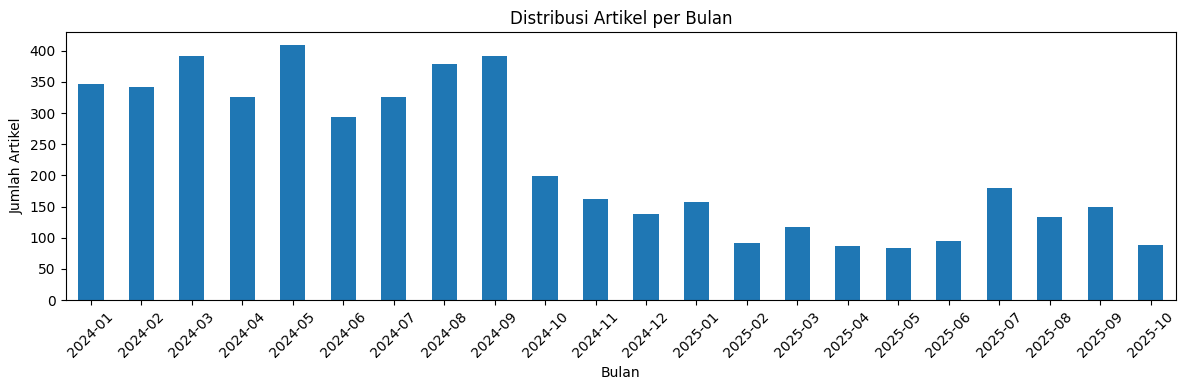

In [100]:
# Visualisasi distribusi per bulan
plt.figure(figsize=(12, 4))
df['date_parsed'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Artikel per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [101]:
# STEP 5: Filter panjang teks agar berada di rentang 1000 - 4000 chars
print("=" * 80)
print("STEP 5: FILTER PANJANG TEKS (1000 - 4000 chars)")
print("=" * 80)

df['text_length'] = df['text'].str.len()

print(f"Text length stats:")
print(df['text_length'].describe())

before = len(df)
df = df[(df['text_length'] >= 1000) & (df['text_length'] <= 4000)].copy()
removed = before - len(df)

print(f"\nDihapus: {removed} artikel di luar rentang 1000–4000 chars")
print(f"Tersisa: {len(df)} baris ({100*len(df)/initial_count:.1f}%)")


STEP 5: FILTER PANJANG TEKS (1000 - 4000 chars)
Text length stats:
count    4887.000000
mean     1991.760385
std       603.288900
min       690.000000
25%      1593.000000
50%      1867.000000
75%      2255.000000
max      5000.000000
Name: text_length, dtype: float64

Dihapus: 88 artikel di luar rentang 1000–4000 chars
Tersisa: 4799 baris (95.0%)


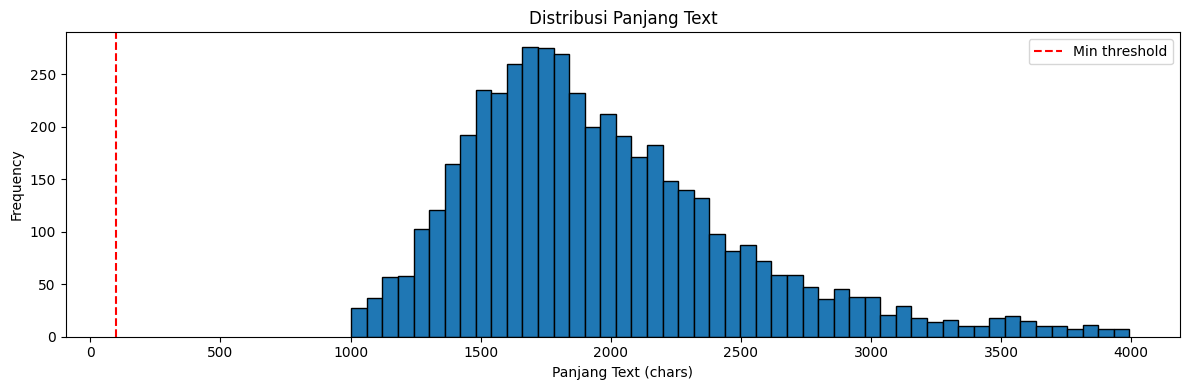

In [102]:
# Visualisasi distribusi panjang text
plt.figure(figsize=(12, 4))
plt.hist(df['text_length'], bins=50, edgecolor='black')
plt.title('Distribusi Panjang Text')
plt.xlabel('Panjang Text (chars)')
plt.ylabel('Frequency')
plt.axvline(x=100, color='r', linestyle='--', label='Min threshold')
plt.legend()
plt.tight_layout()
plt.show()


In [103]:
# Hapus kolom temporary
df = df.drop(columns=['date_parsed', 'text_length', 'title_length', 'image_exists'], errors='ignore')

print("✓ Temporary columns removed")
print(f"Kolom final: {list(df.columns)}")


✓ Temporary columns removed
Kolom final: ['id', 'source', 'title', 'text', 'date', 'category', 'label', 'image_path', 'url', 'thumbnail_url']


In [104]:
# Save ke CSV
df.to_csv(OUTPUT_CSV, index=False, encoding='utf-8')
print(f"✓ Data saved to: {OUTPUT_CSV}")


✓ Data saved to: ../data/raw/turnbackhoax/metadata/tbh_cleaned.csv


In [105]:
# Statistik final
print("=" * 80)
print("STATISTIK FINAL")
print("=" * 80)

print(f"\nTotal awal: {initial_count}")
print(f"Total akhir: {len(df)}")
print(f"Total dihapus: {initial_count - len(df)} ({100*(initial_count - len(df))/initial_count:.1f}%)")
print(f"Retention rate: {100*len(df)/initial_count:.1f}%")

# Label distribution
print(f"\nDistribusi label:")
for label, count in df['label'].value_counts().items():
    print(f"  Label {label}: {count} ({100*count/len(df):.1f}%)")

# Category distribution
if 'category' in df.columns:
    print(f"\nTop 10 kategori:")
    for cat, count in df['category'].value_counts().head(10).items():
        print(f"  - {cat}: {count}")


STATISTIK FINAL

Total awal: 5049
Total akhir: 4799
Total dihapus: 250 (5.0%)
Retention rate: 95.0%

Distribusi label:
  Label 0: 4799 (100.0%)

Top 10 kategori:
  - Fitnah / Hasut / Hoax: 4799


In [106]:
# STEP X: Filter berdasarkan kata kunci politik di title/text
print("=" * 80)
print("STEP X: FILTER ISU POLITIK BERDASARKAN KATA KUNCI")
print("=" * 80)

POLITICAL_KEYWORDS = [
    "prabowo", "subianto", "prabowo subianto", "presiden prabowo", 
    "pemerintahan prabowo", "kabinet prabowo", "menteri prabowo",
    "presiden", "presiden terpilih", "capres", "calon presiden",
    "politik", "pemerintahan", "pemerintah", "negara", "demokrasi", 
    "parlemen", "dpr", "mpr", "dewan", "legislatif",
    "eksekutif", "yudikatif", "pemilu", "pilpres", "pilkada",
    "partai politik", "koalisi", "oposisi", "pemimpin",
    "ekonomi", "fiskal", "anggaran", "apbn", "pajak",
    "inflasi", "pertumbuhan ekonomi", "investasi", "pmdn", "pma",
    "utang", "defisit", "subsidi", "bansos", "bantuan sosial",
    "pembangunan", "infrastruktur", "proyek", "mega proyek",
    "kemenkeu", "kementerian keuangan", "sri mulyani",
    "perdagangan", "ekspor", "impor", "bea cukai",
    "industri", "manufaktur", "umkm", "koperasi",
    "sosial", "pendidikan", "sekolah", "kampus", "universitas",
    "kurikulum", "guru", "dosen", "mahasiswa", "pelajar",
    "kesehatan", "rumah sakit", "puskesmas", "bpjs",
    "nakes", "dokter", "perawat", "farmasi", "obat",
    "kemensos", "kementerian sosial", "kemendikbud",
    "kementerian pendidikan", "kebudayaan", "riset", "teknologi",
    "kemenkes", "kementerian kesehatan",
    "lingkungan", "energi", "alam", "hutan", "deforestasi",
    "perubahan iklim", "emisi", "karbon", "global warming",
    "sda", "sumber daya alam", "tambang", "minyak", "gas",
    "batubara", "minerba", "esdm", "kementerian esdm",
    "air", "sungai", "laut", "samudera", "pesisir",
    "renewable", "energi terbarukan", "surya", "angin",
    "panas bumi", "bioenergy", "pltn", "nuklir",
    "hukum", "ham", "hak asasi manusia", "peradilan", "mahkamah",
    "agung", "mk", "mahkamah konstitusi", "kejaksaan", "kejagung",
    "kepolisian", "polri", "bareskrim", "kpk", "korupsi",
    "advokat", "pengacara", "notaris", "legal", "perundangan",
    "uu", "undang-undang", "perpu", "peraturan pemerintah",
    "kebebasan", "kebebasan pers", "minoritas", "diskriminasi",
    "kesetaraan", "keadilan", "kemenkumham", "kementerian hukum",
    "partai gerindra", "gerindra", "partai demokrat", "demokrat",
    "pkb", "pan", "golkar", "psi", "perindo", "ppp",
    "pdip", "pdi perjuangan", "nasdem", "partai nasdem",
    "koalisi indonesia maju", "koalisi perubahan",
    "anies baswedan", "anies", "ganjar pranowo", "ganjar",
    "megawati", "hasto", "jokowi", "joko widodo",
    "maruf amin", "khofifah", "ridwan kamil",
    "ibu kota negara", "ikn", "nusantara", "kalimantan",
    "papua", "papua barat", "aceh", "perbatasan",
    "natuna", "militer", "tni", "alutsista", "pertahanan",
    "indonesia", "jakarta", "nasional", "kebijakan", "program",
    "rapat", "pertemuan", "kunjungan", "pernyataan", "pidato"
]

pattern = r"(?i)\b(" + "|".join(POLITICAL_KEYWORDS) + r")\b"

before = len(df)
df = df[df['text'].str.contains(pattern, na=False) | df['title'].str.contains(pattern, na=False)].copy()
removed = before - len(df)

print(f"Dihapus: {removed} artikel non-politik (out of topic)")
print(f"Tersisa: {len(df)} artikel politik")


STEP X: FILTER ISU POLITIK BERDASARKAN KATA KUNCI


C:\Users\User\AppData\Local\Temp\ipykernel_14096\555746779.py:59: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['text'].str.contains(pattern, na=False) | df['title'].str.contains(pattern, na=False)].copy()


Dihapus: 550 artikel non-politik (out of topic)
Tersisa: 4249 artikel politik


In [107]:
# Date range
dates = pd.to_datetime(df['date'], errors='coerce')
print(f"Date range:")
print(f"  - Awal: {dates.min().strftime('%Y-%m-%d')}")
print(f"  - Akhir: {dates.max().strftime('%Y-%m-%d')}")

# Text stats
text_lengths = df['text'].str.len()
print(f"\nText length stats:")
print(f"  - Min: {text_lengths.min()}")
print(f"  - Max: {text_lengths.max()}")
print(f"  - Mean: {text_lengths.mean():.0f}")
print(f"  - Median: {text_lengths.median():.0f}")


Date range:
  - Awal: 2024-01-02
  - Akhir: 2025-10-20

Text length stats:
  - Min: 1003
  - Max: 3993
  - Mean: 2002
  - Median: 1901


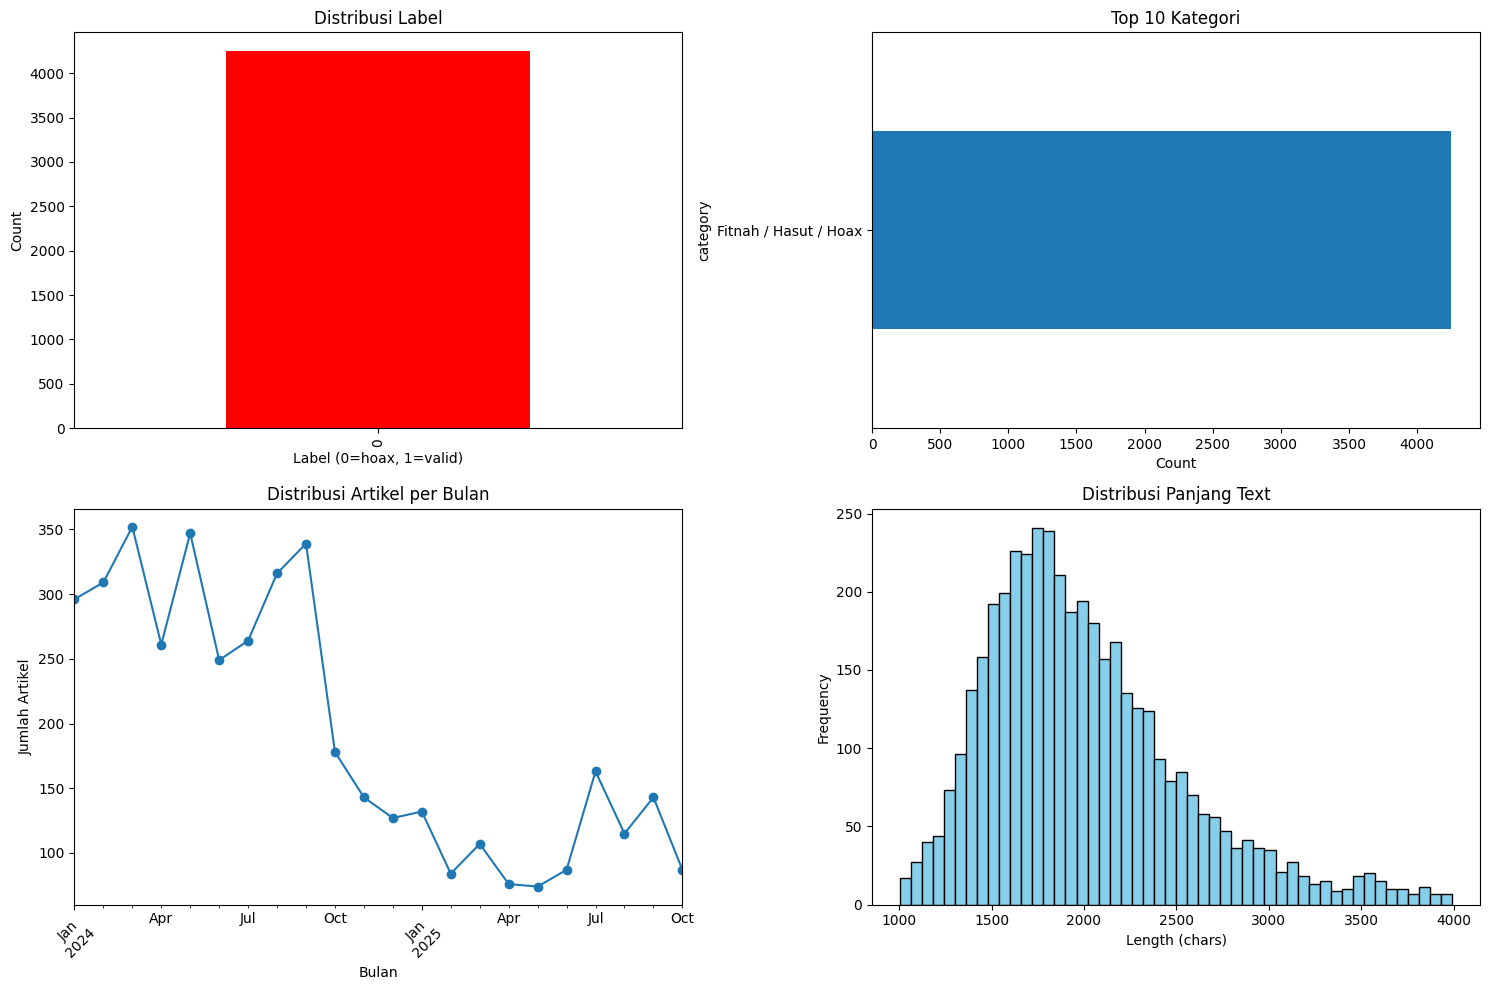

In [108]:
# Visualisasi final
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Label distribution
ax1 = axes[0, 0]
df['label'].value_counts().plot(kind='bar', ax=ax1, color=['red', 'green'])
ax1.set_title('Distribusi Label')
ax1.set_xlabel('Label (0=hoax, 1=valid)')
ax1.set_ylabel('Count')

# 2. Category distribution
ax2 = axes[0, 1]
df['category'].value_counts().head(10).plot(kind='barh', ax=ax2)
ax2.set_title('Top 10 Kategori')
ax2.set_xlabel('Count')

# 3. Date distribution
ax3 = axes[1, 0]
dates = pd.to_datetime(df['date'], errors='coerce')
dates.dt.to_period('M').value_counts().sort_index().plot(kind='line', ax=ax3, marker='o')
ax3.set_title('Distribusi Artikel per Bulan')
ax3.set_xlabel('Bulan')
ax3.set_ylabel('Jumlah Artikel')
ax3.tick_params(axis='x', rotation=45)

# 4. Text length distribution
ax4 = axes[1, 1]
ax4.hist(df['text'].str.len(), bins=50, edgecolor='black', color='skyblue')
ax4.set_title('Distribusi Panjang Text')
ax4.set_xlabel('Length (chars)')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [109]:
# Preview hasil cleaning
df.head(10)

,id,source,title,text,date,category,label,image_path,url,thumbnail_url
0,TBH_POL_00001,turnbackhoax,[SALAH] Video “Prabowo Temui Mahasiswa saat De...,"Faktanya, pada saat demo 25 Agustus 2025 Presi...",2025-09-02,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00001\ima...,https://turnbackhoax.id/2025/09/02/salah-video...,https://turnbackhoax.id/wp-content/uploads/202...
1,TBH_POL_00002,turnbackhoax,[SALAH] Demo Tuntut Penangkapan Jokowi dan Mak...,"Faktanya, video tersebut merupakan demo penola...",2025-07-31,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00002\ima...,https://turnbackhoax.id/2025/07/31/salah-demo-...,https://turnbackhoax.id/wp-content/uploads/202...
2,TBH_POL_00003,turnbackhoax,[PENIPUAN] Wapres RI Gibran Bagi-Bagi Puluhan ...,Unggahan bukan berasal dari akun resmi bercent...,2024-11-01,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00003\ima...,https://turnbackhoax.id/2024/11/01/penipuan-wa...,https://turnbackhoax.id/wp-content/uploads/202...
3,TBH_POL_00004,turnbackhoax,[SALAH] Suasana Panik saat Presiden Mengeluark...,"Faktanya, video merupakan rapat pemilihan ketu...",2025-09-16,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00004\ima...,https://turnbackhoax.id/2025/09/16/salah-suasa...,https://turnbackhoax.id/wp-content/uploads/202...
4,TBH_POL_00005,turnbackhoax,[SALAH] Pesan WhatsApp Pendaftaran Petugas PPS...,Biro Pemerintahan Setda Provinsi Jakarta telah...,2025-04-29,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00005\ima...,https://turnbackhoax.id/2025/04/29/salah-pesan...,https://turnbackhoax.id/wp-content/uploads/202...
5,TBH_POL_00006,turnbackhoax,[SALAH] Puluhan Warga Bersholawat di Gunung La...,Tidak ditemukan informasi atau pemberitaan kre...,2025-05-14,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00006\ima...,https://turnbackhoax.id/2025/05/14/salah-puluh...,https://turnbackhoax.id/wp-content/uploads/202...
6,TBH_POL_00007,turnbackhoax,[SALAH] Dedi Mulyadi Wajibkan Rumah di Jabar D...,Pernyataan resmi hanya menyebutkan pembangunan...,2025-06-18,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00007\ima...,https://turnbackhoax.id/2025/06/18/salah-dedi-...,https://turnbackhoax.id/wp-content/uploads/202...
7,TBH_POL_00008,turnbackhoax,[SALAH] Ketua DPR Puan Maharani Tolak RUU Pera...,Konteks asli foto dalam video adalah momen pid...,2025-03-26,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00008\ima...,https://turnbackhoax.id/2025/03/26/salah-ketua...,https://turnbackhoax.id/wp-content/uploads/202...
8,TBH_POL_00009,turnbackhoax,[PENIPUAN] Tautan Lowongan Kerja di Kantor Pra...,Konteks asli narasi adalah tentang informasi p...,2025-03-07,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00009\ima...,https://turnbackhoax.id/2025/03/07/penipuan-ta...,https://turnbackhoax.id/wp-content/uploads/202...
9,TBH_POL_00010,turnbackhoax,[SALAH] Nadiem Makarim Jadi DPO Kasus Korupsi ...,Kejagung telah membantah informasi mengenai pe...,2025-06-19,Fitnah / Hasut / Hoax,0,data\raw\turnbackhoax\images\TBH_POL_00010\ima...,https://turnbackhoax.id/2025/06/19/salah-nadie...,https://turnbackhoax.id/wp-content/uploads/202...


In [110]:
# Summary
print("=" * 80)
print("SUMMARY")
print("=" * 80)

summary = {
    'Total Awal': initial_count,
    'Total Akhir': len(df),
    'Dihapus': initial_count - len(df),
    'Retention': f"{100*len(df)/initial_count:.1f}%",
    'Artikel dengan Gambar': '100%',
    'Date Range': f"{dates.min().strftime('%Y-%m-%d')} - {dates.max().strftime('%Y-%m-%d')}",
    'Output File': OUTPUT_CSV
}

for key, value in summary.items():
    print(f"{key}: {value}")

print("\n✓ DATASET SIAP UNTUK PSEUDO-LABELING!")


SUMMARY
Total Awal: 5049
Total Akhir: 4249
Dihapus: 800
Retention: 84.2%
Artikel dengan Gambar: 100%
Date Range: 2024-01-02 - 2025-10-20
Output File: ../data/raw/turnbackhoax/metadata/tbh_cleaned.csv

✓ DATASET SIAP UNTUK PSEUDO-LABELING!


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4249 entries, 0 to 5045
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4249 non-null   object
 1   source         4249 non-null   object
 2   title          4249 non-null   object
 3   text           4249 non-null   object
 4   date           4249 non-null   object
 5   category       4249 non-null   object
 6   label          4249 non-null   int64 
 7   image_path     4249 non-null   object
 8   url            4249 non-null   object
 9   thumbnail_url  4249 non-null   object
dtypes: int64(1), object(9)
memory usage: 365.1+ KB
